EX1

Accuracy: 0.6


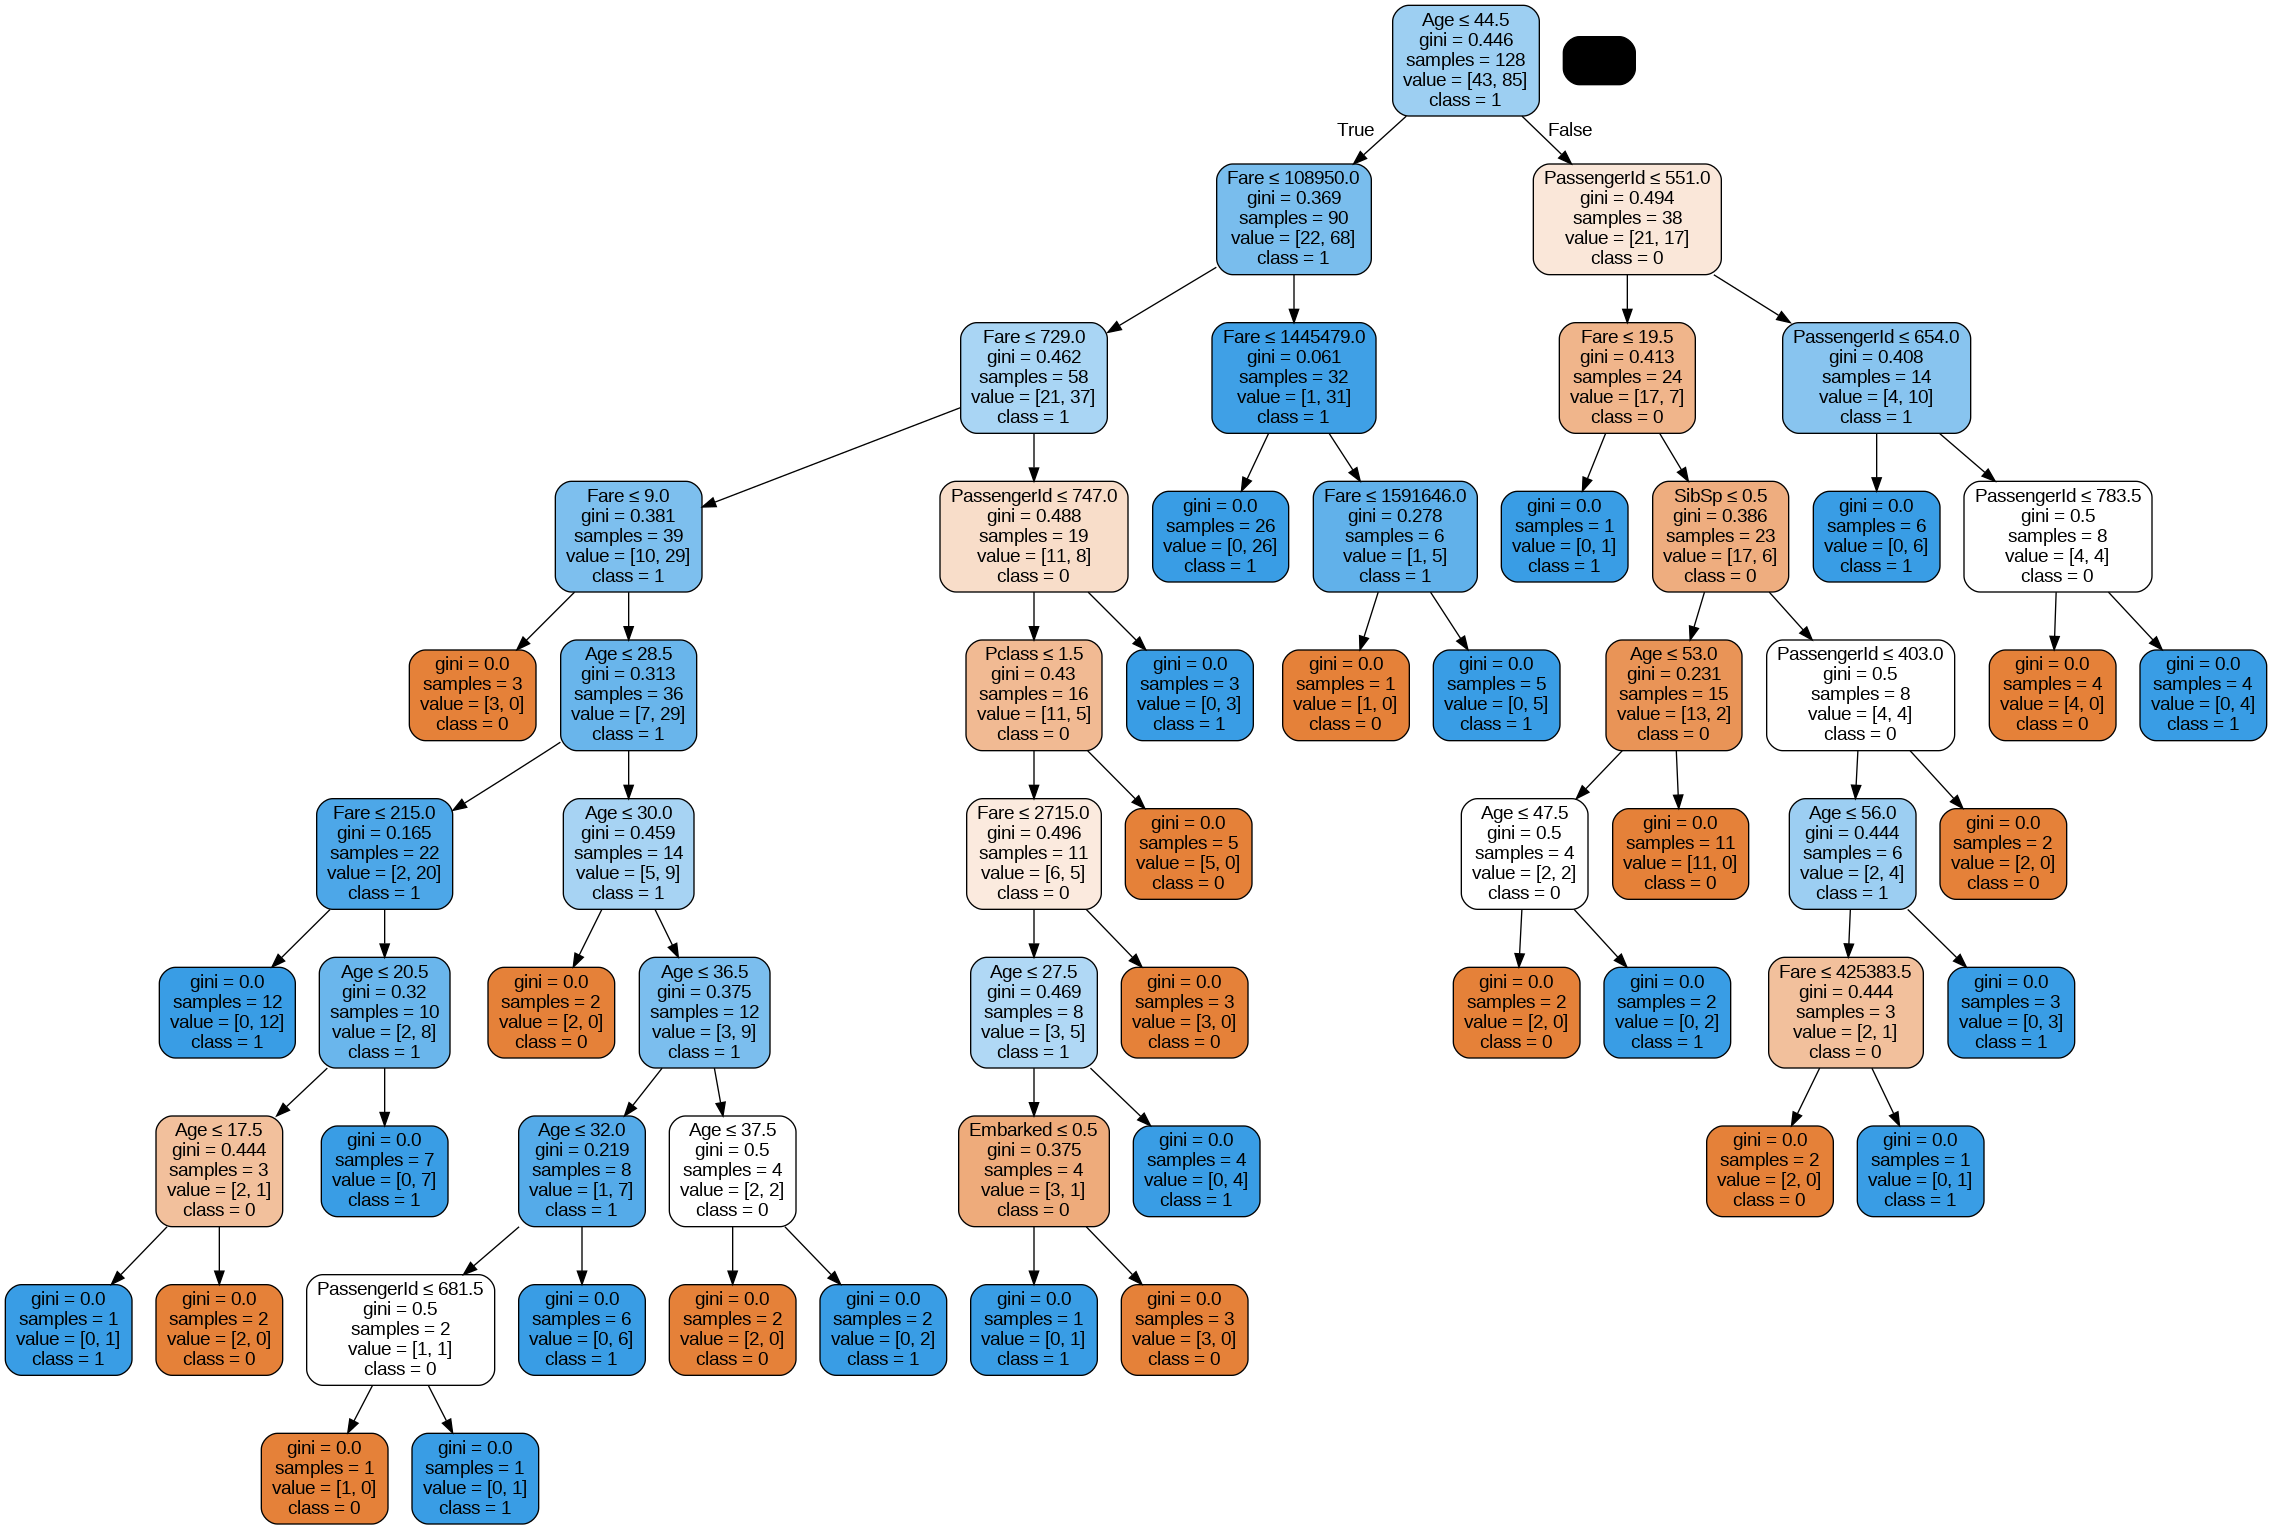

In [ ]:
## 2a)- le type d'algorithme à utiliser pour notre prediction est la Classification car la donnée à prédire est catégorielle
#importation des bibliothèques:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics



#c)-Step1 :Load data (Lecture des données):

#col_names = ['Passengerld','Survived','Pclass;','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

survived_people = pd.read_csv('survived_people.csv', delimiter=';')



##Rename columns:
survived_people.rename(columns={'Passengerld':'PassengerId','Pclass':'Pclass','Name':'Name','Sex':'Sex','Age':'Age','SibSp':'SibSp','Parch':'Parch','Ticket':'Ticket','Fare':'Fare','Cabin':'Cabin','Embarked':'Embarked'}, inplace=True)
# Step2: Data preparation (Pré-traitement des données)

##delete missing value:
survived_people_without_nan= survived_people.dropna()

##feature selection
feature_cols = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = survived_people_without_nan[feature_cols]
Y = survived_people_without_nan.Survived

##convert string features to numerical value
numeric_var = {'Embarked': {'S':0, 'C':1, 'Q':2}}
X = X.replace(numeric_var)


##Splitting data
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

# Step 3: Choice of the model
clf = DecisionTreeClassifier()

#Step4: Training the model
clf = clf.fit(X_train,Y_train)

#Step5: Parameter tunning:

#Step6: Prediction
Y_pred= clf.predict(X_test)


# Step 7: Evaluate the model
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))

#Visualization of decision Tree:

##Installation
!pip install graphviz
!pip install pydotplus

##Dioplaying the Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True,rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('survived_people.png')
Image(graph.create_png())



Exercice2


Distance de chaque point par rapport au nouvel enregistrement:

1= 15000;

2 = 5000,0008;

3 = 25000;

4 = 35000;

5 = 5000¨,0003

Les 2 points les plus proches sont les points 2 et 5. on constate que c'est la classe achat= 0 qui est majoritaire donc une personne de 32 ans avec ces caractéristiques ne fera pas d'achat.